## Vaccum Cleaning Agent with locations A and B

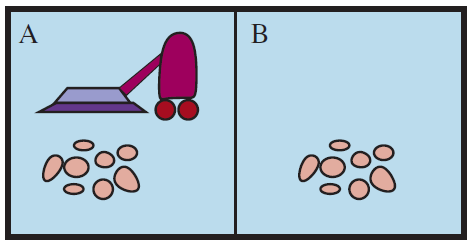

**Figure 2.2** A vacuum-cleaner world with just two locations. Each location can be clean or
dirty, and the agent can move left or right and can clean the square that it occupies. Different
versions of the vacuum world allow for different rules about what the agent can perceive,
whether its actions always succeed, and so on.

# Agent Description:

1. Objective: The aim of the agent .....
2. List the sensors: Location, Status
3. Sensors' values:
>Location -> {A, B}, <br>Status -> {Dirty, Clean}
4. List the actions:
 > Remove Dirt,<br>Go Right, <br>Go Left
5. Agent function: **perception --> action**
> (A, Clean) --> Go Right <br>
> (A, Dirty) --> Remove Dirt<br>
> (B, Clean) --> Go Left<br>
> (B, Dirty) --> Remove Dirt<br>



# Table driven agent

In [ ]:
# Store the agent fucntion as a table
table={('A','Clean'):'Go Right',
       ('A','Dirty'):'Remove Dirt',
       ('B','Clean'):'Go Left',
       ('B','Dirty'):'Remove Dirt'}

In [ ]:
percepts=[]  # to store percept history

def table_driven_agent(percept):
    print('Perception Received: '+ str(percept))
    percepts.append(percept) # updating percept history
    action = table[percept]
    return action

In [ ]:
# lets simulate the agent
import random

# simulating the first perception randomly
Location = random.choice(['A','B'])
Condition = random.choice(['Clean','Dirty'])

# to perceieve environment repeatedly
while True:
    # the agent program is being called with current perception
    action = table_driven_agent((Location, Condition))
    print('Action Performed: '+ action)

    # user control to allow next perception
    cmd = input('Type x to exit! or any key to continue.')
    if(cmd == 'x'): break

    # simulating the next perception
    # if the previous action was 'Go Right' then in the next perception loc=B is obvious
    if action == 'Go Right':
        Location = 'B'
        Condition = random.choice(['Clean','Dirty'])
    # if the previous action was 'Go Left' then in the next perception loc=A is obvious
    elif action == 'Go Left':
        Location = 'A'
        Condition = random.choice(['Clean','Dirty'])
    # if the previous action was 'Remove Dirt' then in the next perception loc remains same and the status=Clean is obvious
    else:
        Condition = 'Clean'

Perception Received: ('B', 'Dirty')
Action Performed: Remove Dirt
Type x to exit! or any key to continue.n
Perception Received: ('B', 'Clean')
Action Performed: Go Left
Type x to exit! or any key to continue.p
Perception Received: ('A', 'Clean')
Action Performed: Go Right
Type x to exit! or any key to continue.p
Perception Received: ('B', 'Clean')
Action Performed: Go Left
Type x to exit! or any key to continue.p
Perception Received: ('A', 'Clean')
Action Performed: Go Right
Type x to exit! or any key to continue.p
Perception Received: ('B', 'Clean')
Action Performed: Go Left
Type x to exit! or any key to continue.p
Perception Received: ('A', 'Clean')
Action Performed: Go Right
Type x to exit! or any key to continue.p
Perception Received: ('B', 'Dirty')
Action Performed: Remove Dirt
Type x to exit! or any key to continue.x


# Simple reflex agent

In [ ]:
def simple_reflex_agent(percept):
    print('Perception Received: '+ str(percept))
    location = percept[0]
    status = percept[1]
    if status =='Dirty':
        action = 'Remove Dirt'
    elif location == 'A':
        action = 'Go Right'
    elif location =='B':
        action = 'Go Left'
    return action

In [ ]:
import random
Location = random.choice(['A','B'])
Condition = random.choice(['Clean','Dirty'])

while True:
    action= simple_reflex_agent((Location,Condition))
    print('Action Performed: '+ action)
    cmd = input('Type x to exit! or any key to continue.')
    if(cmd == 'x'): break
    if action == 'Go Right':
        Location = 'B'
        Condition = random.choice(['Clean','Dirty'])
    elif action== 'Go Left':
        Location = 'A'
        Condition = random.choice(['Clean','Dirty'])
    else:
        Condition = 'Clean'

Perception Received: ('B', 'Clean')
Action Performed: Go Left
Type x to exit! or any key to continue.x


# Model based agent

In [ ]:
# variables to store available information about the world state
world_state = {'A':'Unknown', 'B':'Unknown'}

def update_state(action, percept, model):
    location = percept[0]
    status = percept[1]

    #update the model based on current perception
    model[location] = status

    #update the model based on action
    if action == 'Remove Dirt':
        model[location]='Clean'
    return model


def model_based_reflex_agent(percept):
    location = percept[0]
    status = percept[1]
    global world_state
    if world_state['A'] == 'Clean' and world_state['B'] == 'Clean':
        action = 'Pause'
        return action
    elif status == 'Dirty':
        action = 'Remove Dirt'
    elif location == 'A':
        action = 'Go Right'
    elif location == 'B':
        action = 'Go Left'

    world_state = update_state(action, percept, world_state)
    print('Perception: '+str(percept))
    print('Action Performed: '+ action)
    print('World State: '+str(world_state))
    return action

In [ ]:
import random
Location = random.choice(['A','B'])
Condition= random.choice(['Clean','Dirty'])

while True:
    print('*****')
    action = model_based_reflex_agent((Location,Condition))
    if action == 'Go Right':
        Location = 'B'
        Condition = random.choice(['Clean','Dirty'])
    elif action == 'Go Left':
        Location = 'A'
        Condition = random.choice(['Clean','Dirty'])
    elif action == 'Remove Dirt':
        Condition = 'Clean'
    elif action == 'Pause':
        cmd = input('Type x to exit! or any key to Restart.')
        if(cmd == 'x'): break
        Location = random.choice(['A','B'])
        Condition = random.choice(['Clean','Dirty'])
        world_state = {'A':'Unknown', 'B':'Unknown'}


*****
Perception: ('B', 'Dirty')
Action Performed: Remove Dirt
World State: {'A': 'Unknown', 'B': 'Clean'}
*****
Perception: ('B', 'Clean')
Action Performed: Go Left
World State: {'A': 'Unknown', 'B': 'Clean'}
*****
Perception: ('A', 'Dirty')
Action Performed: Remove Dirt
World State: {'A': 'Clean', 'B': 'Clean'}
*****
Type x to exit! or any key to Restart.x


**Agent Description:**


1. Objective: The agent assists in managing a library's book lending system.



2. List of Sensors:  
Book Availability: {Available, Not Available}

 User Request: {Book Request, No Request}

 Membership Status: {Member, Non-Member}




3. Sensors Values:

 Book Availability: Available, Not Available

 User Request: Book Request, No Request

 Membership Status: Member, Non-Member



4. List of Actions:

 Lend Book

 Book has already Lent

 No Action

 Deny Request



5. Agent Function: Perception --> Action

 (i) (Available, Book Request, Member) --> Lend Book

 (ii) (Available, Book Request, Non-Member) --> Deny Request

 (iii) (Available, No Request, Member) --> No Action

 (iv) (Available, No Request, Non-Member) --> No Action

 (v) (Not Available, Book Request, Member) --> Book has already Lent

 (vi) (Not Available, Book Request, Non-Member) --> Book has already Lent

 (vii) (Not Available, No Request, Member) --> No Action

 (viii) (Not Available, No Request, Non-Member) --> No Action





Table Driven Agent

In [ ]:
# Store the agent function as a table
table = {
    ('Available', 'Book Request', 'Member'): 'Lend Book',
    ('Available', 'Book Request', 'Non-Member'): 'Deny Request',
    ('Available', 'No Request', 'Member'): 'No Action',
    ('Available', 'No Request', 'Non-Member'): 'No Action',
    ('Not Available', 'Book Request', 'Member'): 'Book has already Lent',
    ('Not Available', 'Book Request', 'Non-Member'): 'Book has already Lent',
    ('Not Available', 'No Request', 'Member'): 'No Action',
    ('Not Available', 'No Request', 'Non-Member'): 'No Action'
}


In [ ]:
# To store percept history
percepts = []

def table_driven_agent(percept):
    print('Perception Received: ' + str(percept))
    percepts.append(percept)
    action = table.get(percept, 'No Action')
    return action


In [ ]:
import random

# Simulate the first perception randomly
Book_Availability = random.choice(['Available', 'Not Available'])
User_Request = random.choice(['Book Request', 'No Request'])
Membership_Status = random.choice(['Member', 'Non-Member'])

# To perceive the environment repeatedly
while True:
    # Call the agent program with the current perception
    action = table_driven_agent((Book_Availability, User_Request, Membership_Status))
    print('Action Performed: ' + action)

    # User control to allow the next perception
    cmd = input('Type x to exit, or any key to continue: ')
    if cmd == 'x':
        break

    # Simulate the next perception randomly for each sensor
    Book_Availability = random.choice(['Available', 'Not Available'])
    User_Request = random.choice(['Book Request', 'No Request'])
    Membership_Status = random.choice(['Member', 'Non-Member'])


Perception Received: ('Not Available', 'No Request', 'Member')
Action Performed: No Action
Type x to exit, or any key to continue: a
Perception Received: ('Available', 'Book Request', 'Non-Member')
Action Performed: Deny Request
Type x to exit, or any key to continue: s
Perception Received: ('Not Available', 'No Request', 'Member')
Action Performed: No Action
Type x to exit, or any key to continue: f
Perception Received: ('Not Available', 'No Request', 'Member')
Action Performed: No Action
Type x to exit, or any key to continue: x


Simple Reflex Agent

In [ ]:
# Simple reflex agent function
def simple_reflex_agent(percept):
    print('Perception Received: ' + str(percept))

    book_availability, user_request, membership_status = percept
    if book_availability == 'Available' and user_request == 'Book Request' and membership_status == 'Member':
        action = 'Lend Book'
    elif book_availability == 'Available' and user_request == 'Book Request' and membership_status == 'Non-Member':
        action = 'Deny Request'
    elif book_availability == 'Available' and user_request == 'No Request':
        action = 'No Action'
    elif book_availability == 'Not Available' and user_request == 'Book Request' and membership_status == 'Member':
        action = 'Book has already Lent'
    elif book_availability == 'Not Available' and user_request == 'Book Request' and membership_status == 'Non-Member':
        action = 'Book has already Lent'
    elif book_availability == 'Not Available' and user_request == 'No Request':
        action = 'No Action'

    return action


In [ ]:
# Simple reflex agent simulation
import random

# Initializing sensor values
book_availability = random.choice(['Available', 'Not Available'])
user_request = random.choice(['Book Request', 'No Request'])
membership_status = random.choice(['Member', 'Non-Member'])

while True:
    # Get action from agent based on perception
    action = simple_reflex_agent((book_availability, user_request, membership_status))
    print('Action Performed: ' + action)

    # Ask for new perception input
    cmd = input('Get Perception (yes/no): ')
    if cmd == 'no' or cmd != 'yes':
        break

    # Update sensors based on action
    if action == 'Lend Book':
        book_availability = 'Not Available'
        user_request = random.choice(['Book Request', 'No Request'])
        membership_status = random.choice(['Member', 'Non-Member'])
    elif action == 'Deny Request':
        user_request = 'No Request'
    elif action == 'Book has already Lent':
        book_availability = 'Available'
        user_request = random.choice(['Book Request', 'No Request'])
    else:
        user_request = 'Book Request'


Perception Received: ('Available', 'No Request', 'Non-Member')
Action Performed: No Action
Get Perception (yes/no): yes
Perception Received: ('Available', 'Book Request', 'Non-Member')
Action Performed: Deny Request
Get Perception (yes/no): yes
Perception Received: ('Available', 'No Request', 'Non-Member')
Action Performed: No Action
Get Perception (yes/no): yes
Perception Received: ('Available', 'Book Request', 'Non-Member')
Action Performed: Deny Request
Get Perception (yes/no): no
